Step 1

Read the file train.csv into Python and print a few rows.

In [161]:
import pandas as pd
df = pd.read_csv('data/train.csv',index_col = 0)

Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# df.groupby('Survived').count()
# df_01count = df.groupby('Survived')['Survived'].count()
# pd.Series(df_01count)

Survived
0    549
1    342
Name: Survived, dtype: int64

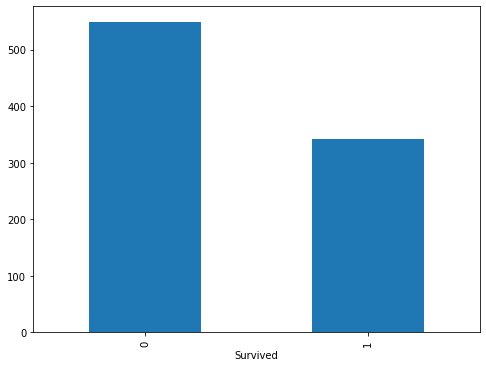

In [4]:
# bar chart
# ax = pd.Series(df_01count).plot.bar(subplots=True, label='', figsize = (8, 6))

Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [5]:
# total number of 1st passenger
# m = df['Pclass'].count()

In [6]:
# %
# n = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['Pclass'].count()
# per_1_sur = n/m
# print('the % of surviving 1st class passengers with regards to the total number of 1st class passengers is', per_1_sur)


the % of surviving 1st class passengers with regards to the total number of 1st class passengers is 0.1526374859708193


Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [259]:
# df_02count = df.groupby(['Sex','Pclass'])['Pclass'].count()
# pd.Series(df_02count)

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

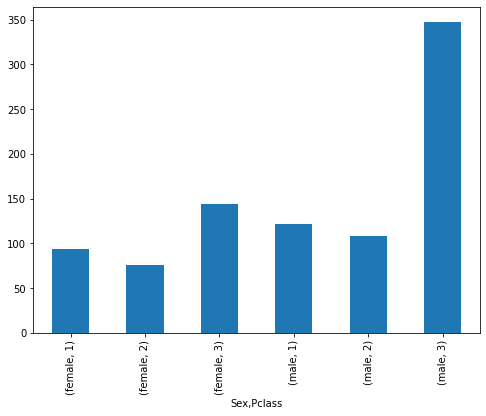

In [260]:
# bar chart
# ax = pd.Series(df_02count).plot.bar(subplots=True, label='', figsize = (8, 6))

In [261]:
#Step 5

#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

/home/guo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/guo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


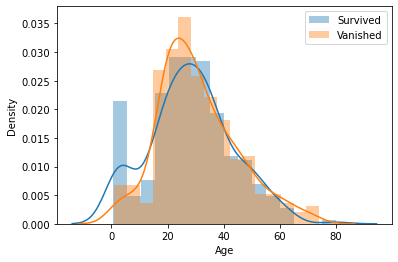

In [262]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
#    sns.distplot(a=df[df['Survived'] == 1]['Age'], hist=True, kde=True,label='Survived', rug=False)
 #   sns.distplot(a=df[df['Survived'] == 0]['Age'], hist=True, kde=True,label='Vanished',rug=False)
  #  plt.legend() 
   # plt.show()

Step 6
Calculate the average age for survived and drowned passengers separately.

In [263]:
# df_02count = df.groupby(['Survived'])['Age'].mean()
# pd.Series(df_02count)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Step 7
Replace missing age values by the mean age.

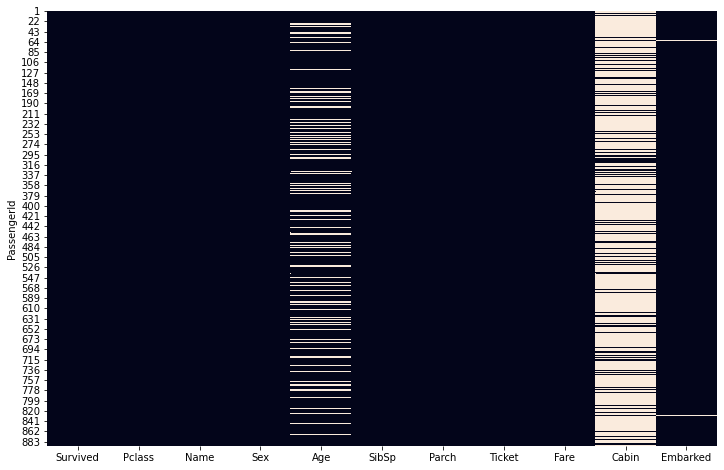

In [162]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False)

In [168]:
# mean_Age = df.groupby('Survived')['Age'].transform('mean')
# print(mean_Age)

PassengerId
1      30.626179
2      28.343690
3      28.343690
4      28.343690
5      30.626179
         ...    
887    30.626179
888    28.343690
889    30.626179
890    28.343690
891    30.626179
Name: Age, Length: 891, dtype: float64


In [169]:
#  compare with origin data
# df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [170]:
# REPLACE NA values with age of non- and survived passengers
# mean_Age = df.groupby('Survived')['Age'].transform('mean')
# df['Age'].fillna(mean_Age, inplace=True)

In [163]:
# REPLACE NA values with age of non- and survived passengers and ...
# mean_Age = df.groupby(['Survived','Sex','Pclass'])['Age'].transform('mean')
# df['Age'].fillna(mean_Age, inplace=True)

In [164]:
# REPLACE NA values with age of all passengers
# df['Age'].fillna(df['Age'].mean(),inplace=True)

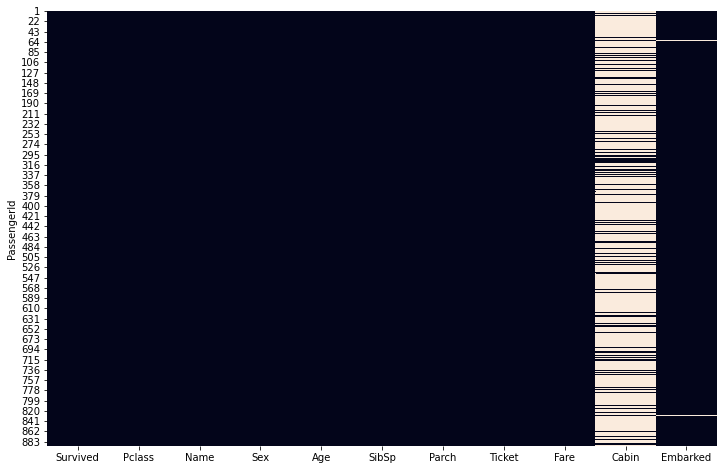

In [165]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False)

Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [166]:
# the order is important for display
# df_03count = df.groupby(['Pclass','Sex','Survived'])['Pclass'].count()
# pd.Series(df_03count)

In [167]:
# pd.DataFrame(df_03count)

In [168]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline

((668, 20), (223, 20), (668,), (223,))

In [172]:
# REPLACE NA values with age of non- and survived passengers and ...
mean_Age = df.groupby(['Survived','Sex','Pclass'])['Age'].transform('mean')
df['Age'].fillna(mean_Age, inplace=True)

In [173]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
# transform a numerical column: Age
kbins = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='kmeans')
columns = df[['Age']]
kbins.fit(columns)
t = kbins.transform(columns)

In [174]:
# fill NA of Age, then scaling
# pipeline1 = make_pipeline(
#        SimpleImputer(strategy='mean_Age'), 
#        KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='kmeans')
#    )

In [ ]:
# Cabin data
#isolating the rooms and letters
df['Cabin_nr'] = df['Cabin'].fillna('Z',inplace=False) 
df["Deck"] = df["Cabin_nr"].str.slice(0,1)


def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df

def one_hot(df, labels, drop_col=False):
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

df = one_hot(df, ["Deck"],drop_col=True)

In [180]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_nr,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,Z,0,0,0,0,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,C85,0,0,1,0,0,0,0,0,0


In [ ]:
# fill NA of Embarked with most frequent values, then binning 
pipeline2 = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [198]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df['Survived']
Xtrain, Xtest,ytrain,ytest = tts(X,y,train_size=0.75,test_size=0.25, random_state=40)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((668, 20), (223, 20), (668,), (223,))

In [199]:
trans = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex','Pclass']),
    ('scale', MinMaxScaler(), ['Fare']),
    ('impute_then_scale', KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='kmeans'), ['Age']),
    ('impute_then_onehot',pipeline2, ['Embarked']),
    ('do_nothing', 'passthrough', ['SibSp','Parch','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Deck_Z']),
])

In [200]:
# fit and transform training data
trans.fit(Xtrain)

Xtrain_transformed = trans.transform(Xtrain)
Xtrain_transformed.shape

(668, 30)

In [201]:
# fit a log-reg model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(Xtrain_transformed, ytrain)

LogisticRegression(max_iter=1000)

In [202]:
#transform test data set
Xtest_transform = trans.transform(Xtest)
Xtest_transform.shape

(223, 30)

In [203]:
#Evaluating metrics
from sklearn.metrics import accuracy_score, classification_report

# predict
ypred = model.predict(Xtrain_transformed)
acc = accuracy_score(ytrain,ypred)
print('Train accuracy is:', round(acc,3))

Train accuracy is: 0.832


In [204]:
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       421
           1       0.80      0.72      0.76       247

    accuracy                           0.83       668
   macro avg       0.82      0.81      0.82       668
weighted avg       0.83      0.83      0.83       668



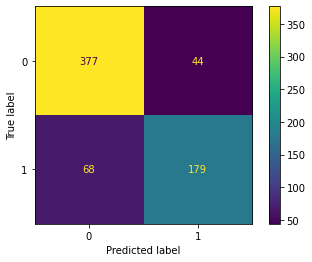

In [205]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,Xtrain_transformed,ytrain)

In [206]:
#transform test data
Xtest_transform = trans.transform(Xtest)
Xtest_transform.shape
ypred = model.predict(Xtest_transform)
acc = accuracy_score(ytest, ypred)
print('Test accuracy is:', round(acc,3))

(223, 30)

In [207]:
ypred = model.predict(Xtest_transform)
acc = accuracy_score(ytest, ypred)
print('Test accuracy is:', round(acc,3))

Test accuracy is: 0.825


In [208]:
# ROC Curve 
# from sklearn.metrics import roc_curve

In [115]:
# Advanced: ROC Curve
# probs = model.predict_proba(Xtrain_transformed)
# roc_curve(ytrain, probs, pos_label=2)

In [13]:
df.Cabin

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [154]:
#Embaked dummy codding
pd.get_dummies(df['Embarked'])
df = df.join(pd.get_dummies(df.Embarked))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_nr,Deck,Room,C,Q,S
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Z,Z,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C85,C,85.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,Z,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C123,C,123.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Z,Z,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Z,Z,NaN,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B42,B,42.0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.818182,1,2,W./C. 6607,23.4500,NaN,S,Z,Z,NaN,0,0,1


In [272]:
# dummy codding SEX
pd.get_dummies(df['Sex'])
df = df.join(pd.get_dummies(df.Sex))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1,1,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,0,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,1,1,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.818182,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0


In [151]:
#isolating the rooms
df['Cabin_nr'] = df['Cabin'].fillna('Z',inplace=False) 

In [152]:
df["Deck"] = df["Cabin_nr"].str.slice(0,1)

In [153]:
df["Room"] = df["Cabin_nr"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
df["Deck"],df['Room']

(PassengerId
 1      Z
 2      C
 3      Z
 4      C
 5      Z
       ..
 887    Z
 888    B
 889    Z
 890    C
 891    Z
 Name: Deck, Length: 891, dtype: object,
 PassengerId
 1        NaN
 2       85.0
 3        NaN
 4      123.0
 5        NaN
        ...  
 887      NaN
 888     42.0
 889      NaN
 890    148.0
 891      NaN
 Name: Room, Length: 891, dtype: float64)

In [278]:
df['Room'] = df['Room'].fillna('0',inplace=False) 

In [155]:
# dummy codding Deck
pd.get_dummies(df['Deck'])
df = df.join(pd.get_dummies(df.Deck))
df

ValueError: columns overlap but no suffix specified: Index(['C'], dtype='object')

In [156]:
def one_hot_column(df, label, drop_col=False):
    '''
    This function will one hot encode the chosen column.
    Args:
        df: Pandas dataframe
        label: Label of the column to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
    '''
    This function will one hot encode a list of columns.
    Args:
        df: Pandas dataframe
        labels: list of the columns to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df



df = one_hot(df, ["Deck"],drop_col=True)

In [312]:
# carbin data -> boll value 
df["Cabin_Data"] = df["Cabin"].isnull().apply(lambda x: not x)
df = one_hot(df, ["Cabin_Data"],drop_col=True) # not valid for this test, as it represents the availability of data

In [313]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z,Cabin_Data_False,Cabin_Data_True
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,1,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,...,0,1,0,0,0,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,...,0,0,0,0,0,0,0,1,1,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,...,1,0,0,0,0,0,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.818182,1,2,W./C. 6607,23.4500,NaN,...,0,0,0,0,0,0,0,1,1,0


In [282]:
df['Cabin_nr'] = df['Cabin'].fillna(0) # zero, 
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,...,85,0,0,1,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,...,123,0,0,1,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,...,0,0,0,0,0,0,0,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,...,42,0,1,0,0,0,0,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.818182,1,2,W./C. 6607,23.4500,NaN,...,0,0,0,0,0,0,0,0,0,1


In [177]:
# df['Cabin_nr1'] = df['Cabin'].fillna(df.Cabin.isna()) # zero, 
# df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Cabin_nr,Cabin_nr1
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,C85,C85
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,C123,C123
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1,0,True
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0,B42,B42
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0,0,True


In [142]:
#Cabin dummy codding
# convert Cabin to a Boolean


# df['cabin'] = df['Cabin_nr'].str[0]
# pd.get_dummies(df['cabin'])

In [301]:
# Logistic Regression
X = df[['Pclass', 'Age', 'SibSp', 'Fare','C','Q','S','female','male',
        'Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Deck_Z']] # input data, independent vars
y = df['Survived']                                   # target data, dependent var

In [302]:
X.shape, y.shape

((891, 18), (891,))

In [303]:
Xtrain, Xtest,ytrain,ytest = tts(X,y,train_size=0.75,test_size=0.25, random_state=40)

In [304]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((668, 18), (223, 18), (668,), (223,))

In [305]:
model = LogisticRegression()
model.fit(Xtrain,ytrain) # trains the model

/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [306]:
model.coef_

array([[-8.98242986e-01, -4.65300429e-02, -2.77446088e-01,
         1.30019635e-03,  8.22055447e-01,  5.99083377e-01,
         3.26164365e-01,  2.17570609e+00, -3.80863614e-01,
         4.09241419e-02,  1.21803406e-01,  1.85110245e-02,
         7.13743418e-01,  1.29324508e+00,  2.10998380e-01,
        -2.42122724e-01,  0.00000000e+00, -3.62260242e-01]])

In [307]:
model.intercept_

array([2.08784877])

In [308]:
ypred = model.predict(Xtrain)
accuracy_score(ytrain,ypred) # --> proportion of correct predictions

0.8173652694610778

In [309]:
# evaluate on the test set
ypred_test = model.predict(Xtest)
accuracy_score(ytest,ypred_test)

0.8071748878923767